# Data and Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random as rnd
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from IPython.display import clear_output
from scipy import stats
SEED=4242
rnd.seed(10)
SIZE=30000
ALPHA=0.03

In [ ]:
df= pd.read_csv('/content/DFORE394.csv', low_memory=False)

In [ ]:
df.columns

Index(['user_type', 'transactor_id', 'locations_count', 'total_vends',
       'Total_VDPM', 'AvgDaysBetweenWalletLoad', 'AvgDaysBetweenVends',
       'WalletLoad_Recency', 'Vend_Recency', 'MostRecentWalletLoadDate',
       'MostRecentVendDate', 'FirstWalletLoadDate', 'FirstVendDate',
       'Vend_DaysonBook', 'WalletLoad_DaysonBook', 'Vend_FrequencyLast30Days',
       'WalletLoad_FrequencyLast30Days', 'WalletLoadAmountLast30Days',
       'MoneyLast30Days', 'Vend_FrequencyLast60Days',
       'WalletLoad_FrequencyLast60Days', 'WalletLoadAmountLast60Days',
       'MoneyLast60Days', 'Vend_FrequencyLast90Days',
       'WalletLoad_FrequencyLast90Days', 'WalletLoadAmountLast90Days',
       'MoneyLast90Days', 'Vend_FrequencyLast120Days',
       'WalletLoad_FrequencyLast120Days', 'WalletLoadAmountLast120Days',
       'MoneyLast120Days', 'Vend_FrequencyLast180Days',
       'WalletLoad_FrequencyLast180Days', 'WalletLoadAmountLast180Days',
       'MoneyLast180Days'],
      dtype='object')

## Variables

In [ ]:
df.set_index('transactor_id', inplace= True)

In [ ]:
df['NomadFlg']= np.where(df.locations_count==1, False, True)

In [ ]:
df.columns

Index(['user_type', 'locations_count', 'total_vends', 'Total_VDPM',
       'AvgDaysBetweenWalletLoad', 'AvgDaysBetweenVends', 'WalletLoad_Recency',
       'Vend_Recency', 'MostRecentWalletLoadDate', 'MostRecentVendDate',
       'FirstWalletLoadDate', 'FirstVendDate', 'Vend_DaysonBook',
       'WalletLoad_DaysonBook', 'Vend_FrequencyLast30Days',
       'WalletLoad_FrequencyLast30Days', 'WalletLoadAmountLast30Days',
       'MoneyLast30Days', 'Vend_FrequencyLast60Days',
       'WalletLoad_FrequencyLast60Days', 'WalletLoadAmountLast60Days',
       'MoneyLast60Days', 'Vend_FrequencyLast90Days',
       'WalletLoad_FrequencyLast90Days', 'WalletLoadAmountLast90Days',
       'MoneyLast90Days', 'Vend_FrequencyLast120Days',
       'WalletLoad_FrequencyLast120Days', 'WalletLoadAmountLast120Days',
       'MoneyLast120Days', 'Vend_FrequencyLast180Days',
       'WalletLoad_FrequencyLast180Days', 'WalletLoadAmountLast180Days',
       'MoneyLast180Days', 'NomadFlg'],
      dtype='object')

In [ ]:
cols= ['AvgDaysBetweenWalletLoad', 'AvgDaysBetweenVends',
       'WalletLoad_Recency', 'Vend_Recency',
       'Vend_DaysonBook', 'WalletLoad_DaysonBook', 'Vend_FrequencyLast180Days',
       'WalletLoad_FrequencyLast180Days', 'WalletLoadAmountLast180Days']

In [ ]:
df=df.loc[np.min(df.loc[:,['AvgDaysBetweenWalletLoad', 'AvgDaysBetweenVends']]!=0, axis=1), cols]

In [ ]:
df.index

Index(['google-oauth2|112872581275891852293',
       'google-oauth2|116615156989069358636',
       'apple|001068.a4da174bb39a423c81f5d381f3593692.2155',
       'google-oauth2|109966030683590479063', 'auth0|620fc4bd64ce69006fd438e0',
       'auth0|61bfdb43fdd15e0069358a6e', 'auth0|6170a1ac07a59e0077363ae7',
       'apple|000653.444b453001504c438c9557171d6b93c7.0009',
       'apple|000521.8917dd8ff3f04af3b381fdd91f11ff4f.1936',
       'apple|001059.598ccdb81ec34af08239d471e6cabee8.1848',
       ...
       'auth0|60f831973953db0069d5a464', 'google-oauth2|102239660070896252322',
       'apple|002021.dbd16e07c2654d03b16a982238edee0d.2353',
       'auth0|620d743538eba50068ea9209', 'google-oauth2|103589794464085853848',
       'auth0|6202c9c0c296ad0069c3ed30', 'google-oauth2|117191895617623899585',
       'google-oauth2|103636639685974989195', 'auth0|61fc9746cc6dfb006c610b41',
       'apple|001741.bd78228dc6ae4da88125dea65271846f.2039'],
      dtype='object', name='transactor_id', length=1164

In [ ]:
fl=df[cols[1:]] < df[cols[1:]].quantile(.95)

In [ ]:
df1= df.loc[fl.min(axis=1)]

In [ ]:
df1.describe()

,AvgDaysBetweenWalletLoad,AvgDaysBetweenVends,WalletLoad_Recency,Vend_Recency,Vend_DaysonBook,WalletLoad_DaysonBook,Vend_FrequencyLast180Days,WalletLoad_FrequencyLast180Days,WalletLoadAmountLast180Days
count,88120.000000,88120.000000,88120.000000,88120.000000,88120.000000,88120.000000,88120.000000,88120.000000,88120.000000
mean,12.283137,2.681695,20.572084,14.518305,78.196652,56.543770,31.398559,4.652394,12.804883
std,8.938006,1.578644,20.782217,18.359277,46.962431,40.383618,19.777712,2.651806,18.943086
min,1.000000,1.000000,0.000000,0.000000,3.000000,3.000000,2.000000,1.000000,0.000000
25%,6.000000,1.000000,6.000000,3.000000,40.000000,26.000000,16.000000,3.000000,0.000000
50%,10.000000,2.000000,14.000000,7.000000,69.000000,45.000000,26.000000,4.000000,0.000000
75%,16.000000,4.000000,28.000000,17.000000,109.000000,78.000000,42.000000,6.000000,20.000000
max,92.000000,7.000000,112.000000,99.000000,213.000000,188.000000,104.000000,13.000000,89.750000


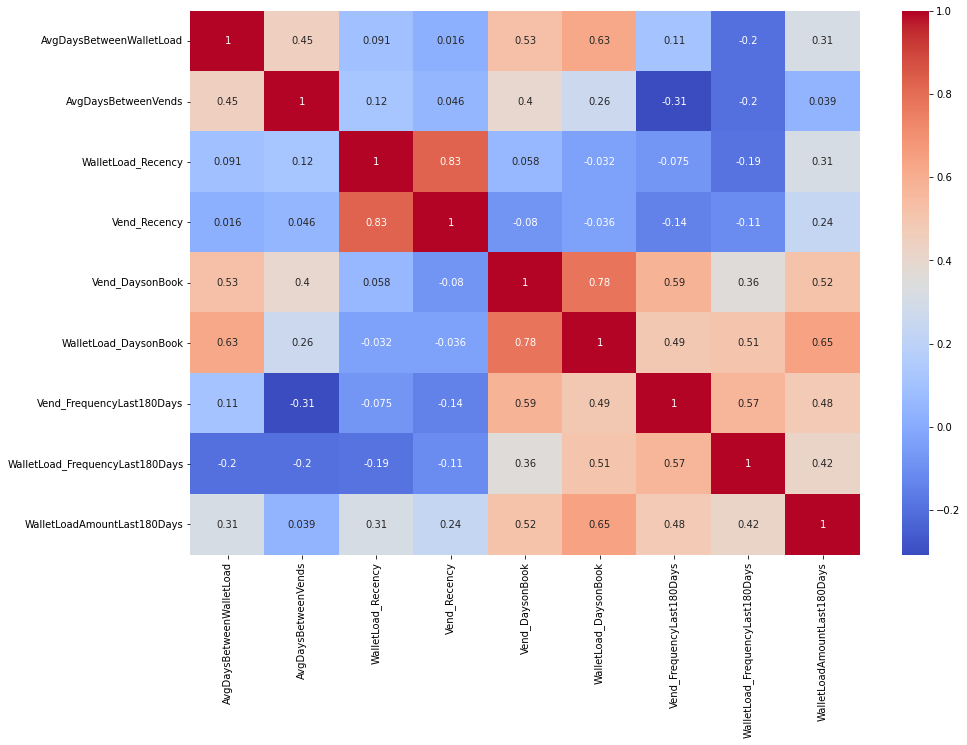

In [ ]:
plt.figure(figsize = (15,10))
sns.heatmap(df1.corr(), fmt='.2g',cmap='coolwarm', annot= True)

In [ ]:
df1.head()

,AvgDaysBetweenWalletLoad,AvgDaysBetweenVends,WalletLoad_Recency,Vend_Recency,Vend_DaysonBook,WalletLoad_DaysonBook,Vend_FrequencyLast180Days,WalletLoad_FrequencyLast180Days,WalletLoadAmountLast180Days
transactor_id,,,,,,,,,
google-oauth2|112872581275891852293,32,6,53,52,132,131,19,3,30.0
google-oauth2|116615156989069358636,9,2,0,0,66,66,34,7,5.0
apple|001068.a4da174bb39a423c81f5d381f3593692.2155,22,3,3,2,183,182,69,7,50.0
google-oauth2|109966030683590479063,8,2,21,21,92,52,50,6,20.0
auth0|620fc4bd64ce69006fd438e0,9,1,15,3,31,19,24,2,0.0


# K Means Modeling

## Scaling

In [ ]:
qseries= np.zeros(len(df1))
for c in cols:
  qseries= qseries+ pd.qcut(df1[c], 5, labels=False, duplicates= 'drop').values+1
  print(c)
# df1['qsum']= qseries

AvgDaysBetweenWalletLoad
AvgDaysBetweenVends
WalletLoad_Recency
Vend_Recency
Vend_DaysonBook
WalletLoad_DaysonBook
Vend_FrequencyLast180Days
WalletLoad_FrequencyLast180Days
WalletLoadAmountLast180Days


(array([ 1410.,  2635.,  1765.,  4480.,  2665.,  7226.,  8476.,  4884.,
        10119.,  4829.,  8330.,  7403.,  3671.,  6803.,  3233.,  5228.,
         3334.,   972.,   628.,    29.]),
 array([ 9. , 10.6, 12.2, 13.8, 15.4, 17. , 18.6, 20.2, 21.8, 23.4, 25. ,
        26.6, 28.2, 29.8, 31.4, 33. , 34.6, 36.2, 37.8, 39.4, 41. ]),
 <a list of 20 Patch objects>)

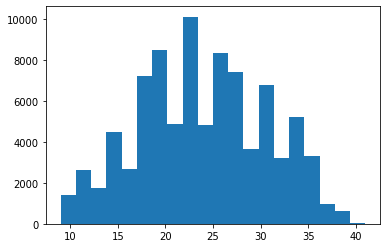

In [ ]:
plt.hist(qseries, bins= 20) 

In [ ]:
mms = MinMaxScaler()
mms.fit(df1)
data_transformed = mms.transform(df1)

In [ ]:
idx= [i for i,v in enumerate(data_transformed[0:].tolist())]

In [ ]:
qseries

array([36., 22., 31., ..., 24., 16., 17.])

## Train/ Test 

In [ ]:
train, test, idx_train, idx_test = train_test_split(data_transformed, idx, test_size=0.2, shuffle= True, random_state=4242, stratify= qseries)

## Choice of clusters

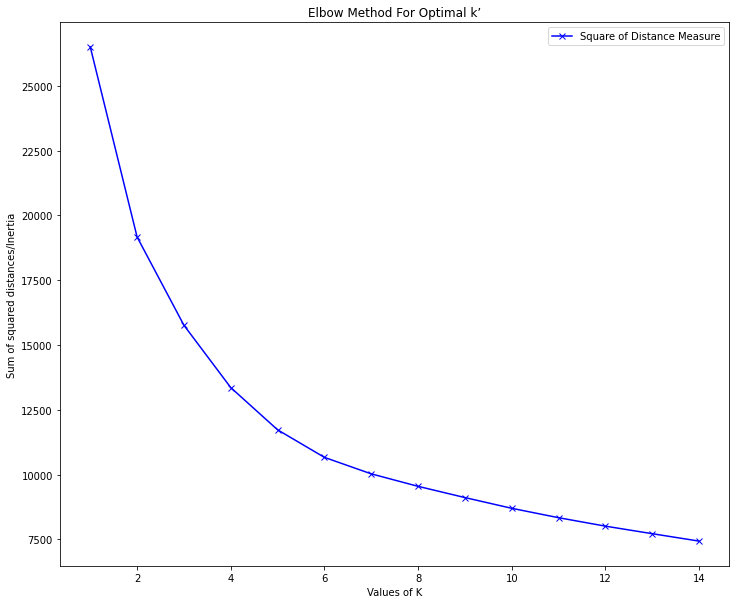

In [ ]:
Sum_of_squared_distances = []
plt.figure(figsize=(12,10))
K = range(1,15)
for num_clusters in K :
 kmeans = KMeans(n_clusters=num_clusters)
 kmeans.fit(train)
 Sum_of_squared_distances.append(kmeans.inertia_)
plt.plot(K,Sum_of_squared_distances,'bx-', label= 'Square of Distance Measure')
plt.xlabel('Values of K') 
plt.ylabel('Sum of squared distances/Inertia') 
plt.legend()
plt.title('Elbow Method For Optimal k’')
plt.show()

In [ ]:
range_n_clusters = range(3,10)
silhouette_avg = []
for num_clusters in range_n_clusters:
 # initialise kmeans
 kmeans = KMeans(n_clusters=num_clusters)
 kmeans.fit(train)
 cluster_labels = kmeans.labels_
 # silhouette score
 silhouette_avg.append(silhouette_score(train, cluster_labels))
 clear_output(wait=True)
 print('Calculated for ', num_clusters)

Calculated for  9


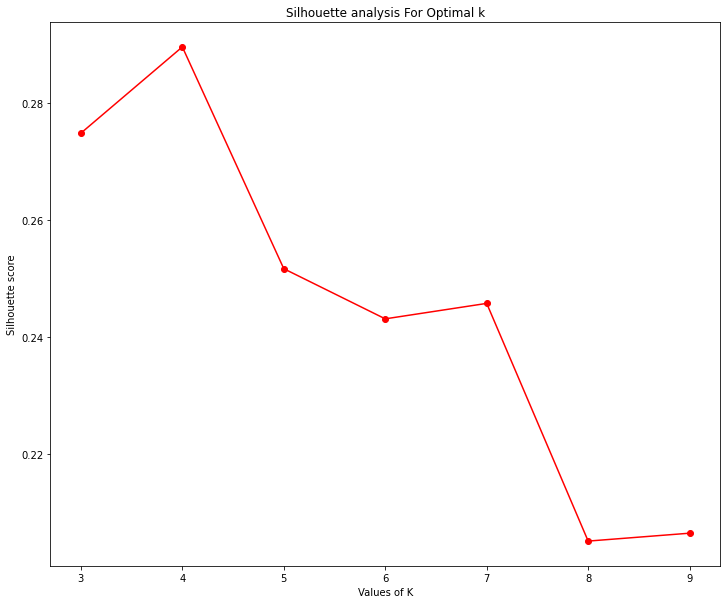

In [ ]:
plt.figure(figsize=(12,10))
plt.plot(range_n_clusters,silhouette_avg,'ro-')
plt.xlabel('Values of K') 
plt.ylabel('Silhouette score') 
plt.title('Silhouette analysis For Optimal k')
plt.show()

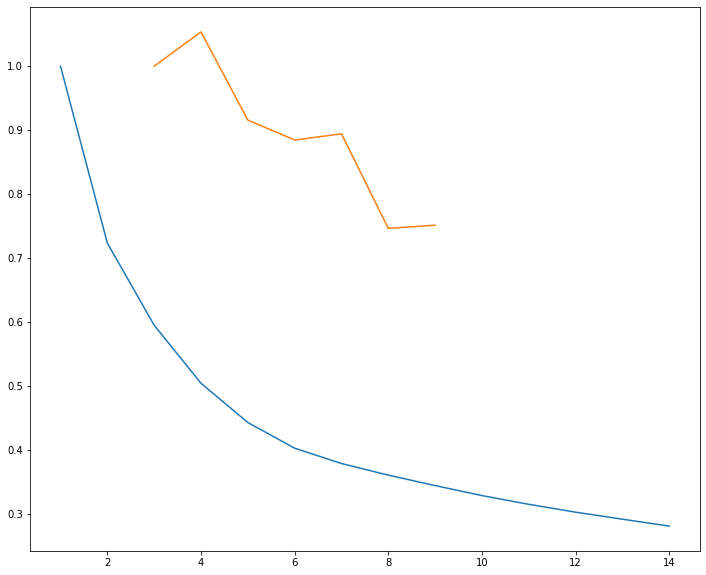

In [ ]:
plt.figure(figsize=(12,10))
plt.plot(K,np.array(Sum_of_squared_distances)/ Sum_of_squared_distances[0])
plt.plot(range_n_clusters,np.array(silhouette_avg)/silhouette_avg[0])

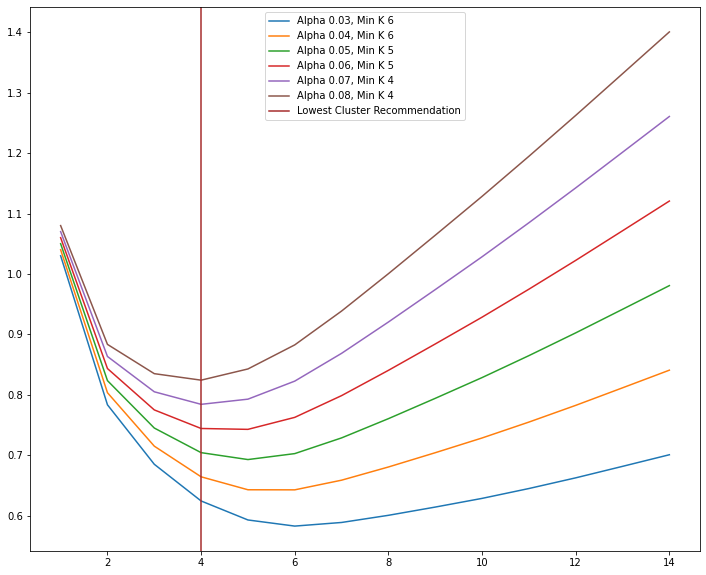

In [ ]:
lminIdx=99999
plt.figure(figsize=(12,10))
for a in [.03,.040,.05,.06,.07, .08]:
  modified_intertia= np.array(Sum_of_squared_distances)/ Sum_of_squared_distances[0]+a*np.array([i+1 for i in range(len(Sum_of_squared_distances))])
  minIdx= np.argmin(modified_intertia)
  if lminIdx > minIdx:
    lminIdx= minIdx+1
  plt.plot(K, modified_intertia, label='Alpha {}, Min K {}'.format(a, minIdx+1))
plt.axvline(lminIdx, label= 'Lowest Cluster Recommendation', color= 'brown')
plt.legend()

In [ ]:
lminIdx

4

## K Means Fit

In [ ]:
km = KMeans(n_clusters=4)
km = km.fit(train)
tr_cluster_labels = km.labels_

# Result & Insights

## Train

In [ ]:
pca = PCA(n_components=2)
pca.fit(train)

PCA(n_components=2)

In [ ]:
df3= pd.DataFrame(pca.fit_transform(train))
df3.columns= ['PCA_1', 'PCA_2']

In [ ]:
df3.to_csv('train_pcs_clstr04042022.csv')

In [ ]:
df3['cluster']= tr_cluster_labels

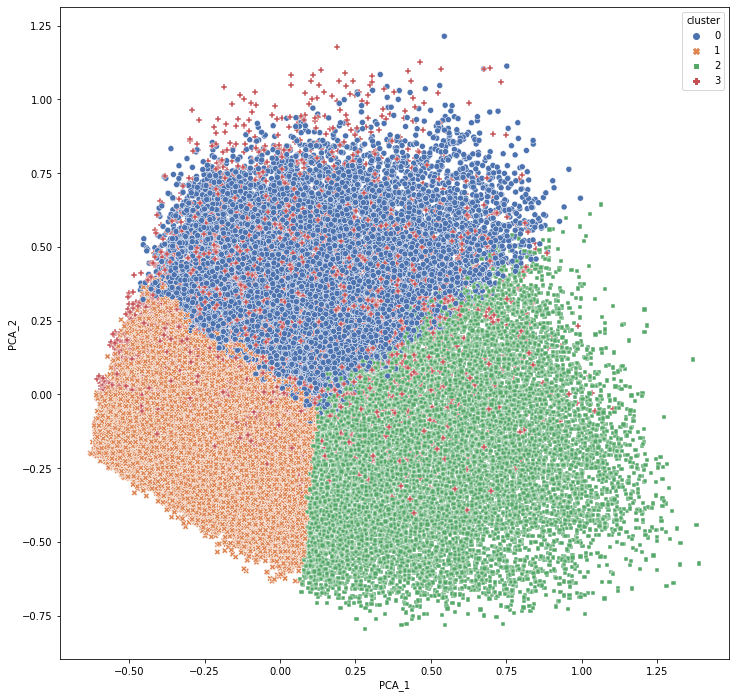

In [ ]:
plt.figure(figsize=(12,12))
sns.scatterplot(data=df3, x="PCA_1", y="PCA_2", hue="cluster", style= 'cluster', palette="deep")

In [ ]:
weights = pca.components_

In [ ]:
df1.columns

Index(['AvgDaysBetweenWalletLoad', 'AvgDaysBetweenVends', 'WalletLoad_Recency',
       'Vend_Recency', 'Vend_DaysonBook', 'WalletLoad_DaysonBook',
       'Vend_FrequencyLast180Days', 'WalletLoad_FrequencyLast180Days',
       'WalletLoadAmountLast180Days'],
      dtype='object')

In [ ]:
df4=pd.DataFrame({
    'columns': list(df1.columns),
    'Weight1': list(weights[0]),
    'Weight2': list(weights[1])
})

In [ ]:
df4['norm']= np.sqrt(df4.Weight1**2+ df4.Weight2**2)

In [ ]:
df4.sort_values(by='norm', inplace= True, ascending= False)

In [ ]:
df4

,columns,Weight1,Weight2,norm
1,AvgDaysBetweenVends,0.164200,0.769653,0.786974
4,Vend_DaysonBook,0.514259,0.154149,0.536865
7,WalletLoad_FrequencyLast180Days,0.360853,-0.382209,0.525641
5,WalletLoad_DaysonBook,0.519532,0.055823,0.522522
6,Vend_FrequencyLast180Days,0.346008,-0.328291,0.476966
8,WalletLoadAmountLast180Days,0.416145,-0.016784,0.416484
2,WalletLoad_Recency,0.025675,0.249029,0.250349
3,Vend_Recency,-0.008088,0.200163,0.200327
0,AvgDaysBetweenWalletLoad,0.121755,0.156636,0.198392


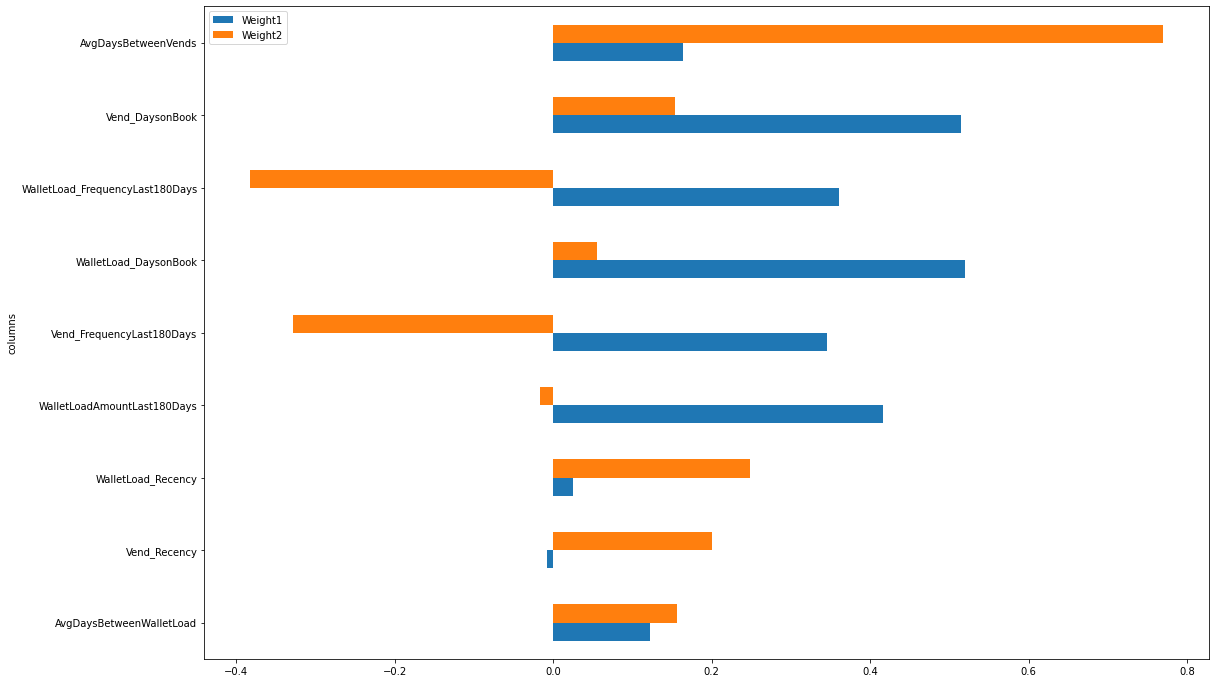

In [ ]:
# plt.figure(figsize=(18,12))
df4.sort_values('norm', ascending=True).plot(x="columns", y=["Weight1", "Weight2"], kind="barh", figsize=(18,12))

Text(0, 0.5, 'PC 1')

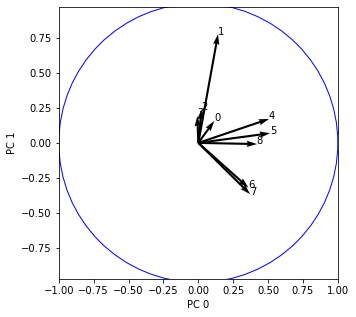

In [ ]:
PCs = pca.components_

# Use quiver to generate the basic plot
fig = plt.figure(figsize=(5,5))
plt.quiver(np.zeros(PCs.shape[1]), np.zeros(PCs.shape[1]),
           PCs[0,:], PCs[1,:], 
           angles='xy', scale_units='xy', scale=1)

# Add labels based on feature names (here just numbers)
feature_names = np.arange(PCs.shape[1])
for i,j,z in zip(PCs[1,:]+0.02, PCs[0,:]+0.02, feature_names):
    plt.text(j, i, z, ha='center', va='center')

# Add unit circle
circle = plt.Circle((0,0), 1, facecolor='none', edgecolor='b')
plt.gca().add_artist(circle)

# Ensure correct aspect ratio and axis limits
plt.axis('equal')
plt.xlim([-1.0,1.0])
plt.ylim([-1.0,1.0])

# Label axes
plt.xlabel('PC 0')
plt.ylabel('PC 1')

In [ ]:
len(cluster_labels)

70496

In [ ]:
train.shape

(70496, 9)

## Test

In [ ]:
te_cluster_labels= km.fit_predict(test)

In [ ]:
np.unique(te_cluster_labels, return_counts=True)

(array([0, 1, 2, 3], dtype=int32), array([3959, 3955, 8241, 1469]))

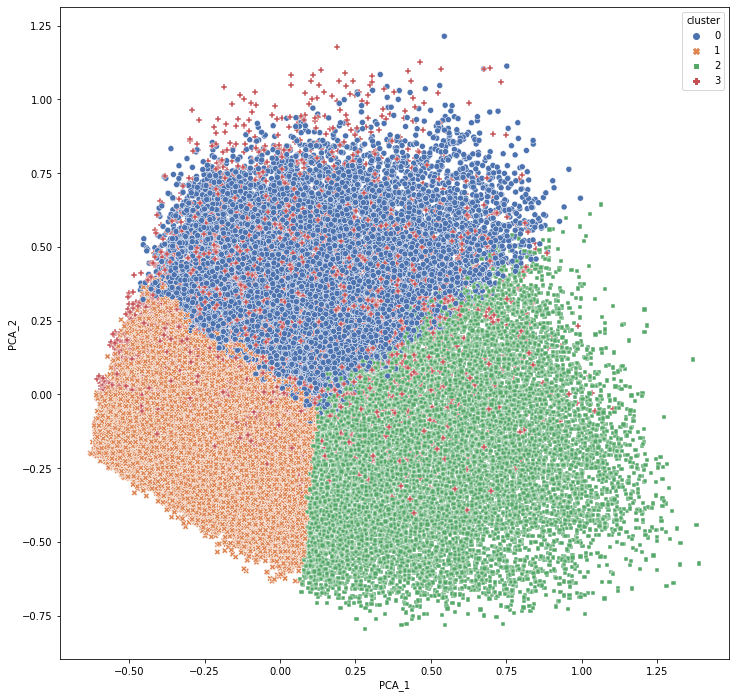

In [ ]:
df4= pd.DataFrame(pca.fit_transform(test))
df4.columns= ['PCA_1', 'PCA_2']
df4['cluster']= te_cluster_labels
plt.figure(figsize=(12,12))
sns.scatterplot(data=df3, x="PCA_1", y="PCA_2", hue="cluster", style= 'cluster', palette="deep")

## Variable Analysis

In [ ]:
df1.columns

Index(['AvgDaysBetweenWalletLoad', 'AvgDaysBetweenVends', 'WalletLoad_Recency',
       'Vend_Recency', 'Vend_DaysonBook', 'WalletLoad_DaysonBook',
       'Vend_FrequencyLast180Days', 'WalletLoad_FrequencyLast180Days',
       'WalletLoadAmountLast180Days'],
      dtype='object')

In [ ]:
df1['cluster']= -9999
df1['flag']= 'NA'

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
df1.iloc[idx_train,9]= tr_cluster_labels
df1.iloc[idx_train,10]= 'train'

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [ ]:
df1.iloc[idx_test,9]= te_cluster_labels
df1.iloc[idx_test,10]= 'test'

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [ ]:
pd.crosstab(df1.flag, df1.cluster, normalize='index')

cluster,0,1,2,3
flag,,,,
test,0.224637,0.224410,0.467601,0.083352
train,0.219715,0.469062,0.228070,0.083154


In [ ]:
df4= df1.groupby(['flag', 'cluster'])[cols].describe()

In [ ]:
recs=[]
for c in cols:
  sz1= df4.loc[('train', 2),(c, 'count')]
  m1= df4.loc[('train', 2),(c, 'mean')]
  s1= df4.loc[('train', 2),(c, 'std')]**2
  m2= df4.loc[('test', 2),(c, 'mean')]
  sz2= df4.loc[('test', 2),(c, 'count')]
  s2= df4.loc[('test', 2),(c, 'std')]**2
  t, p = stats.ttest_ind(df1.loc[df1.flag=='train', c].values, df1.loc[df1.flag=='test', c].values, equal_var = False)
  print(c,round(m1,2),round(s1,2),round(m2,2),round(s2,2),round(t,2),round(p,2))
  recs.append([c,round(m1,2),round(s1,2),round(m2,2),round(s2,2),round(t,2),round(p,2)])

AvgDaysBetweenWalletLoad 14.64 75.93 8.24 23.49 1.03 0.3
AvgDaysBetweenVends 2.31 1.11 1.85 0.72 0.83 0.4
WalletLoad_Recency 15.57 198.08 14.24 136.95 0.84 0.4
Vend_Recency 9.3 112.13 9.82 97.48 0.14 0.89
Vend_DaysonBook 125.35 1347.21 45.95 630.8 -0.16 0.87
WalletLoad_DaysonBook 102.24 1354.92 31.77 280.6 -0.07 0.95
Vend_FrequencyLast180Days 55.71 333.33 24.49 202.1 -1.46 0.14
WalletLoad_FrequencyLast180Days 7.63 7.94 3.87 3.73 -1.14 0.25
WalletLoadAmountLast180Days 32.98 480.54 1.56 28.85 -0.53 0.6


In [ ]:
df5=pd.DataFrame(recs)
df5.columns=['Variable', 'Train- Mean', 'Train- Variance', 'Test- Mean', 'Test- Variance', 'Welch T Stat', 'Welch Test P Score']

In [ ]:
df5

,Variable,Train- Mean,Train- Variance,Test- Mean,Test- Variance,Welch T Stat,Welch Test P Score
0,AvgDaysBetweenWalletLoad,14.64,75.93,8.24,23.49,1.03,0.30
1,AvgDaysBetweenVends,2.31,1.11,1.85,0.72,0.83,0.40
2,WalletLoad_Recency,15.57,198.08,14.24,136.95,0.84,0.40
3,Vend_Recency,9.30,112.13,9.82,97.48,0.14,0.89
4,Vend_DaysonBook,125.35,1347.21,45.95,630.80,-0.16,0.87
5,WalletLoad_DaysonBook,102.24,1354.92,31.77,280.60,-0.07,0.95
6,Vend_FrequencyLast180Days,55.71,333.33,24.49,202.10,-1.46,0.14
7,WalletLoad_FrequencyLast180Days,7.63,7.94,3.87,3.73,-1.14,0.25
8,WalletLoadAmountLast180Days,32.98,480.54,1.56,28.85,-0.53,0.60


In [ ]:
df4

AvgDaysBetweenWalletLoad                                         \
                                 count       mean        std  min   25%   50%   
flag  cluster                                                                   
test  0                         3959.0  14.245264   8.340815  2.0   8.0  12.0   
      1                         3955.0  18.621745  11.085223  1.0  11.0  16.0   
      2                         8241.0   8.238563   4.846490  1.0   5.0   7.0   
      3                         1469.0  11.880191   8.367533  1.0   6.0  10.0   
train 0                        15489.0  18.837820  11.338548  1.0  11.0  16.0   
      1                        33067.0   8.207216   4.707594  1.0   5.0   7.0   
      2                        16078.0  14.640627   8.713957  1.0   9.0  13.0   
      3                         5862.0  11.675026   8.483430  1.0   6.0  10.0   

                          AvgDaysBetweenVends            ...  \
                75%   max               count      mean  ...   
flag  cluster                                            ...   
test  0        18.0  84.0              3959.0  2.237686  ...   
      1        24.0  91.0              3955.0  4.842984  ...   
      2        10.0  75.0              8241.0  1.849533  ...   
      3        15.0  72.0              1469.0  2.621511  ...   
train 0        24.0  92.0             15489.0  4.888760  ...   
      1        11.0  88.0             33067.0  1.853782  ...   
      2        18.0  92.0             16078.0  2.310860  ...   
      3        15.0  76.0              5862.0  2.563971  ...   

              WalletLoad_FrequencyLast180Days        \
                                          75%   max   
flag  cluster                                         
test  0                                  10.0  13.0   
      1                                   4.0  10.0   
      2                                   5.0  13.0   
      3                                   5.0  13.0   
train 0                                   4.0  10.0   
      1                                   5.0  13.0   
      2                                  10.0  13.0   
      3                                   5.0  13.0   

              WalletLoadAmountLast180Days                                   \
                                    count       mean        std  min   25%   
flag  cluster                                                                
test  0                            3959.0  33.434784  22.254351  0.0  15.0   
      1                            3955.0   9.901454  11.629028  0.0   0.0   
      2                            8241.0   1.563845   5.371681  0.0   0.0   
      3                            1469.0  28.897223  19.163999  0.0  15.0   
train 0                           15489.0   9.902608  11.554070  0.0   0.0   
      1                           33067.0   1.592975   5.467247  0.0   0.0   
      2                           16078.0  32.975232  21.921251  0.0  15.0   
      3                            5862.0  28.193083  19.421074  0.0  15.0   

                                  
                50%   75%    max  
flag  cluster                     
test  0        30.0  50.0  89.00  
      1         5.0  15.0  80.00  
      2         0.0   0.0  60.00  
      3        25.0  40.0  89.00  
train 0         5.0  15.0  71.75  
      1         0.0   0.0  80.00  
      2        30.0  50.0  89.75  
      3        25.0  40.0  89.00  

[8 rows x 72 columns]

In [ ]:
df1.loc[df1.flag=='train', c].values

array([30.,  5., 50., ...,  0.,  0.,  0.])

In [ ]:
df1.head()

,AvgDaysBetweenWalletLoad,AvgDaysBetweenVends,WalletLoad_Recency,Vend_Recency,Vend_DaysonBook,WalletLoad_DaysonBook,Vend_FrequencyLast180Days,WalletLoad_FrequencyLast180Days,WalletLoadAmountLast180Days,cluster,flag
transactor_id,,,,,,,,,,,
google-oauth2|112872581275891852293,32,6,53,52,132,131,19,3,30.0,0,train
google-oauth2|116615156989069358636,9,2,0,0,66,66,34,7,5.0,1,train
apple|001068.a4da174bb39a423c81f5d381f3593692.2155,22,3,3,2,183,182,69,7,50.0,2,train
google-oauth2|109966030683590479063,8,2,21,21,92,52,50,6,20.0,0,test
auth0|620fc4bd64ce69006fd438e0,9,1,15,3,31,19,24,2,0.0,1,train


In [ ]:
gf1= df1.loc[df1.flag=='train']
print(gf1.shape)
gf2=gf1.groupby('cluster')[c].quantile(.95).reset_index()
gf1= gf1.merge(gf2, how='inner', on= 'cluster', suffixes=('', '_y'))
gf1=gf1.loc[gf1.loc[:,c] <= gf1.loc[:,c+'_y']]
print(gf1.shape)

(70496, 11)
(67034, 12)


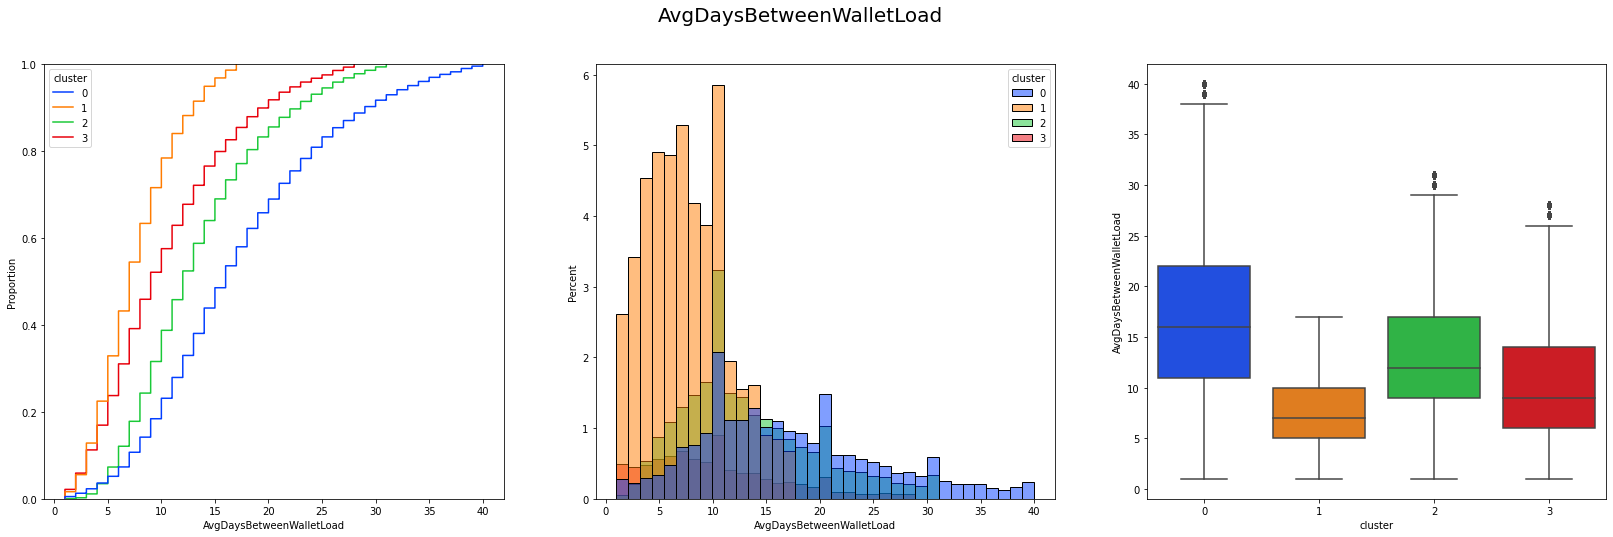

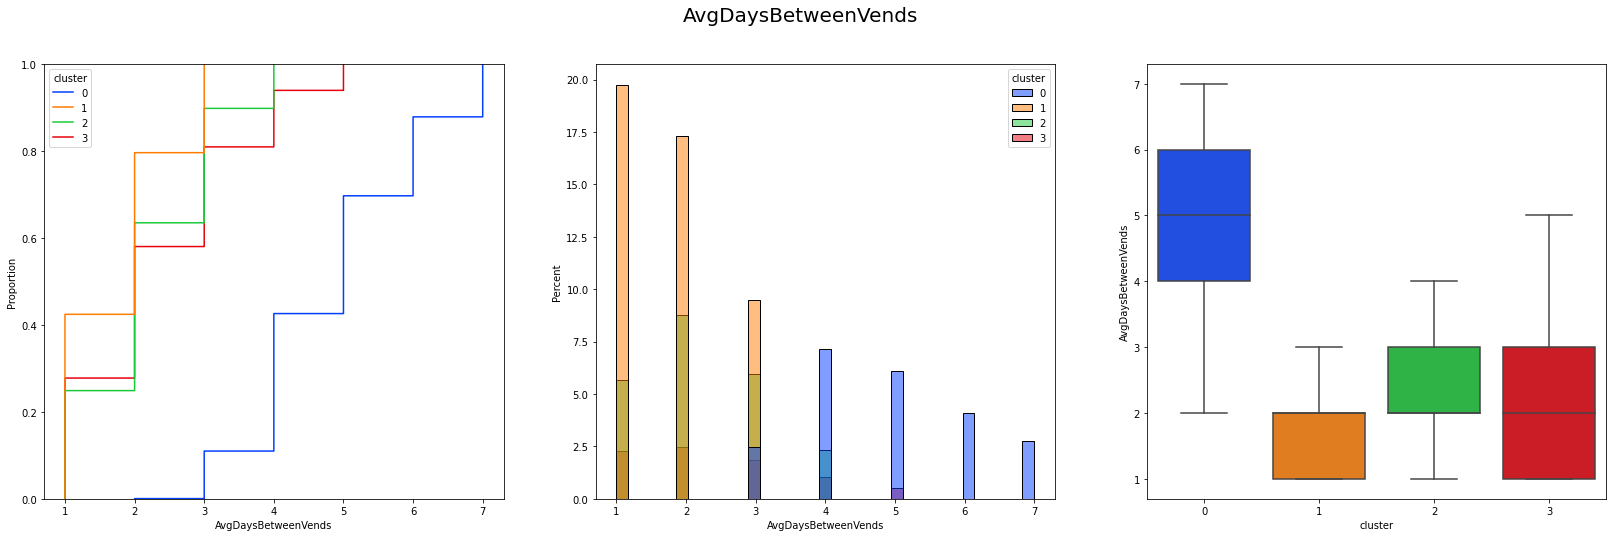

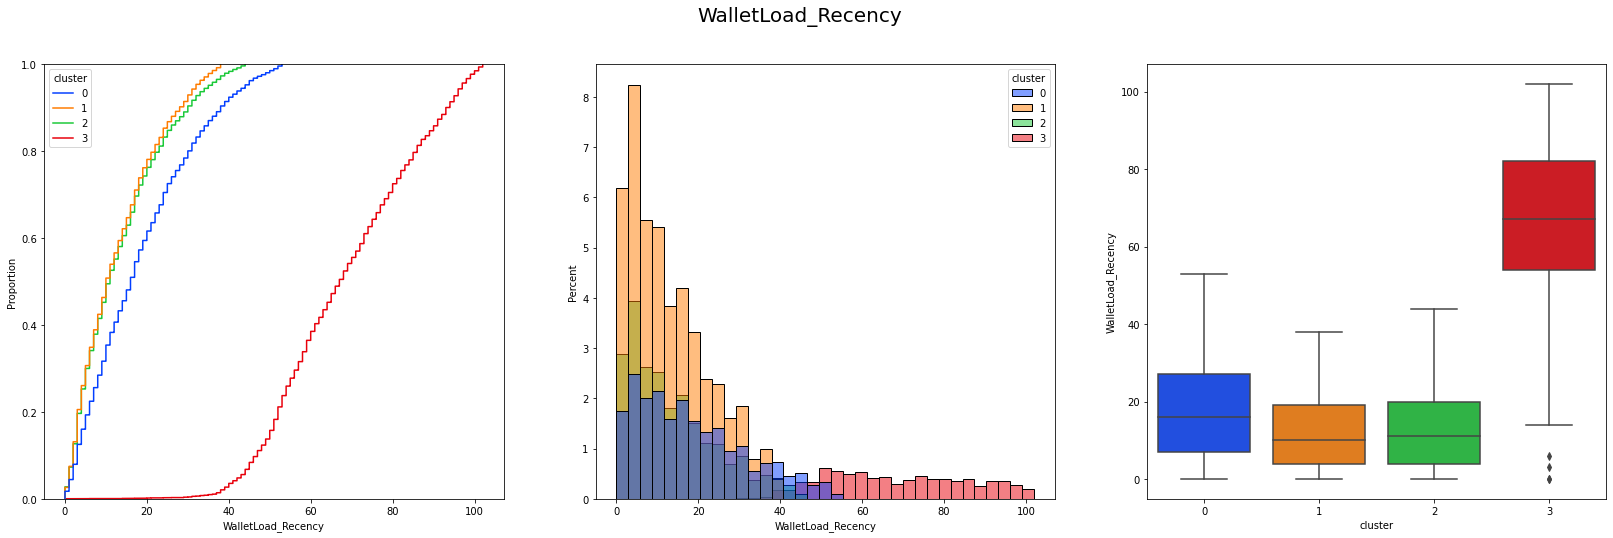

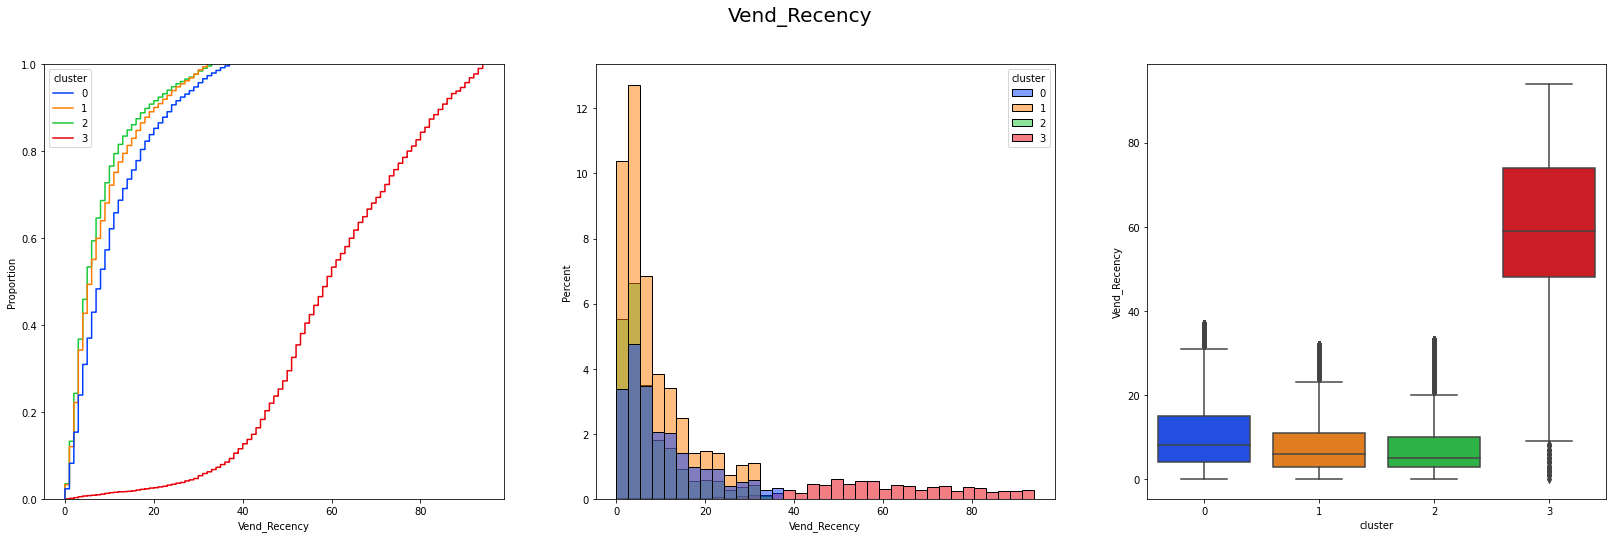

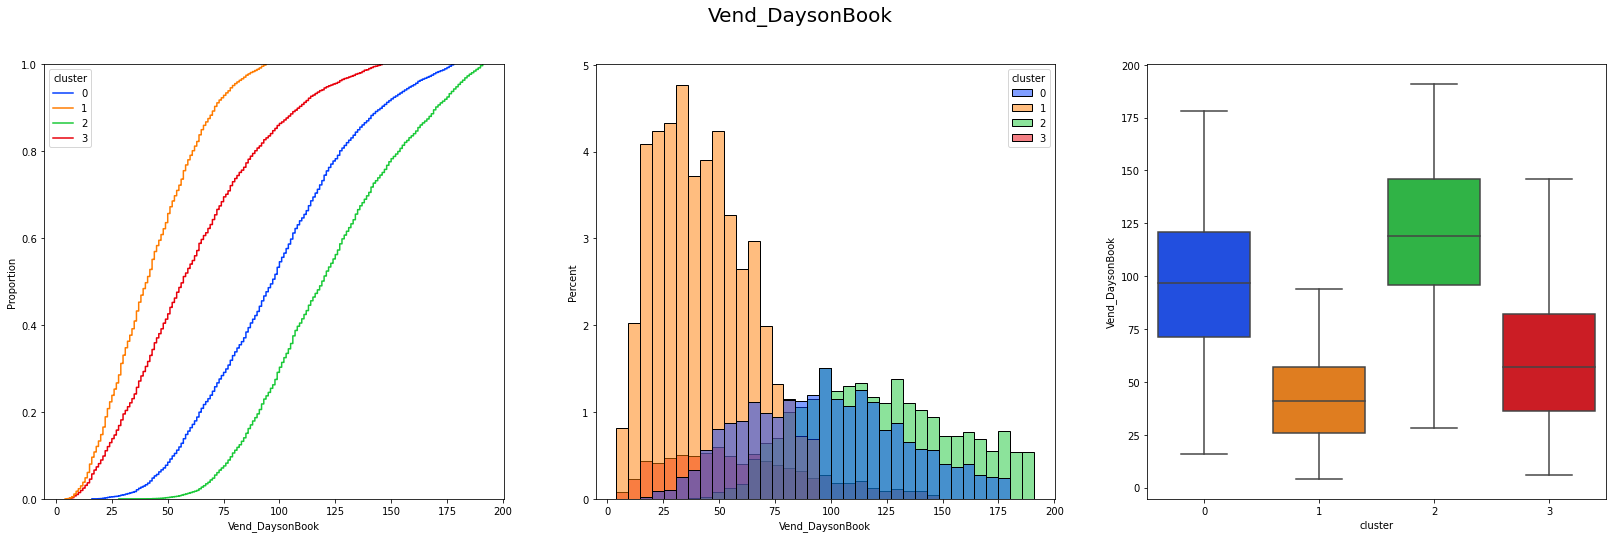

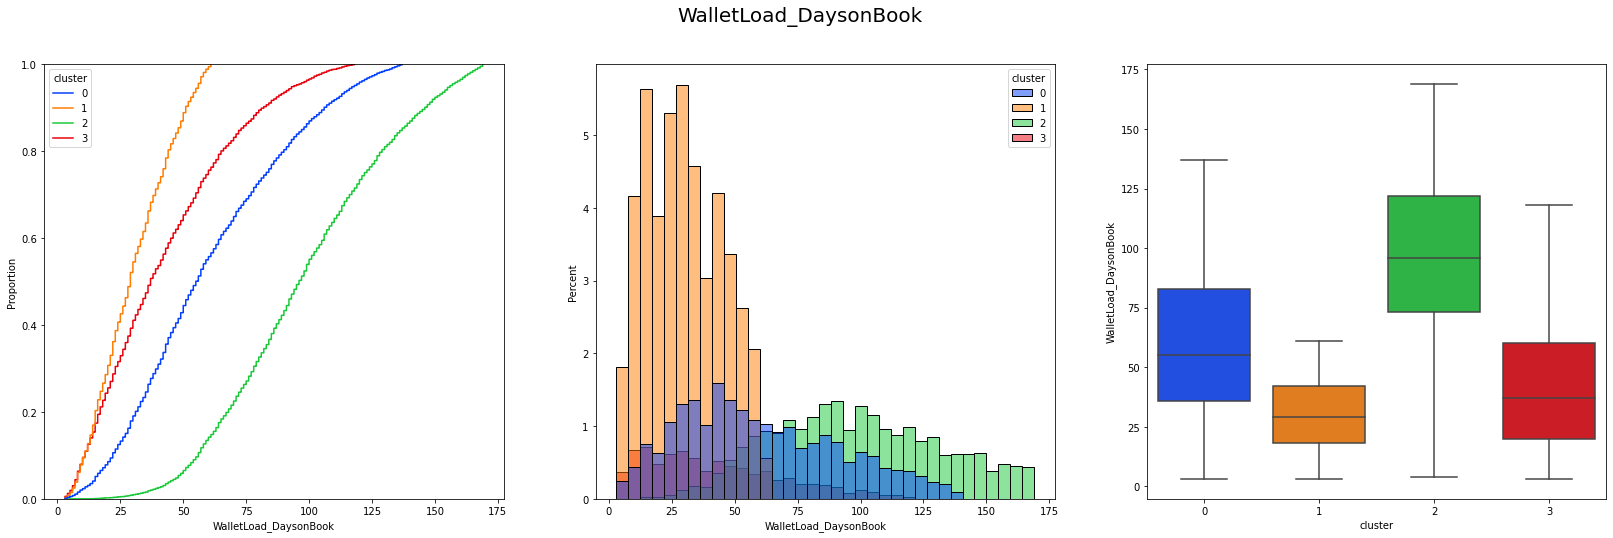

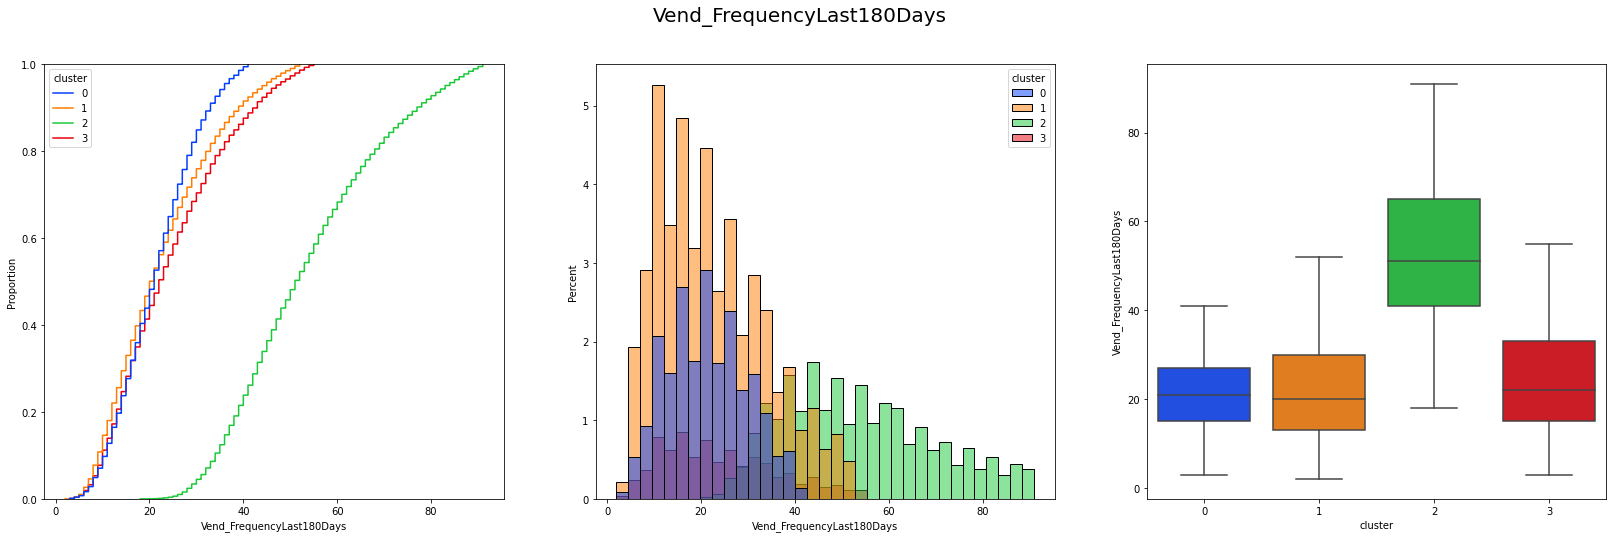

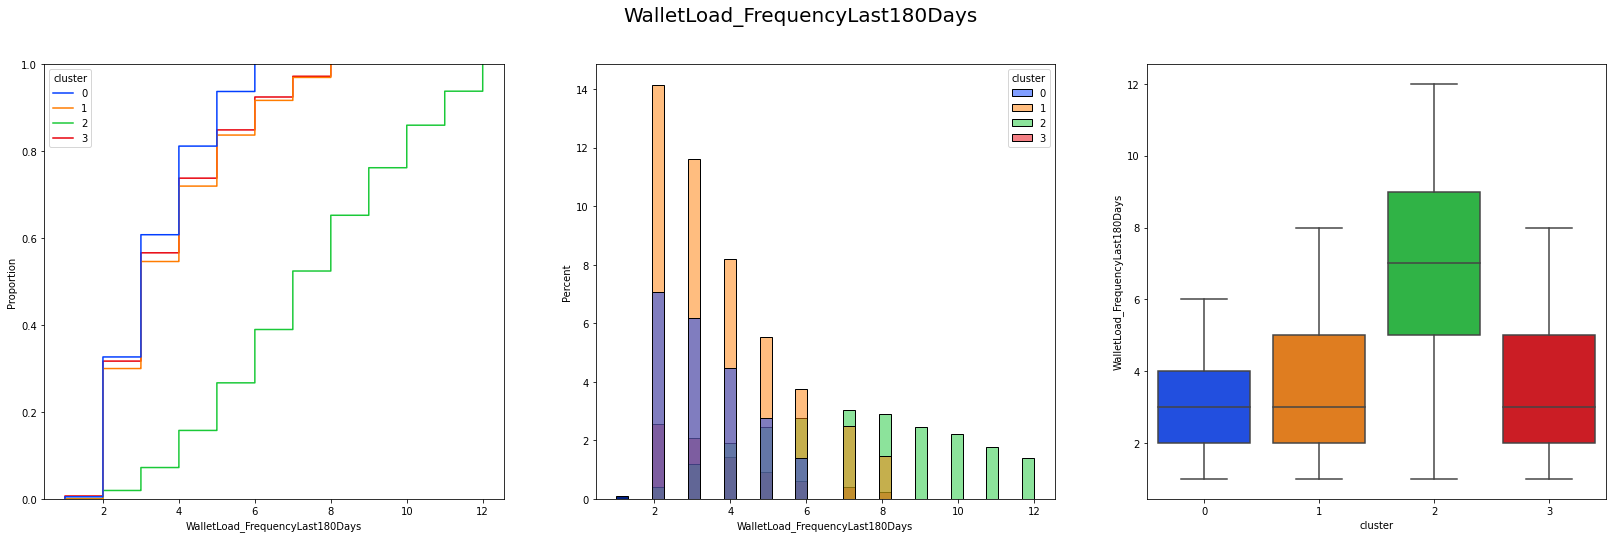

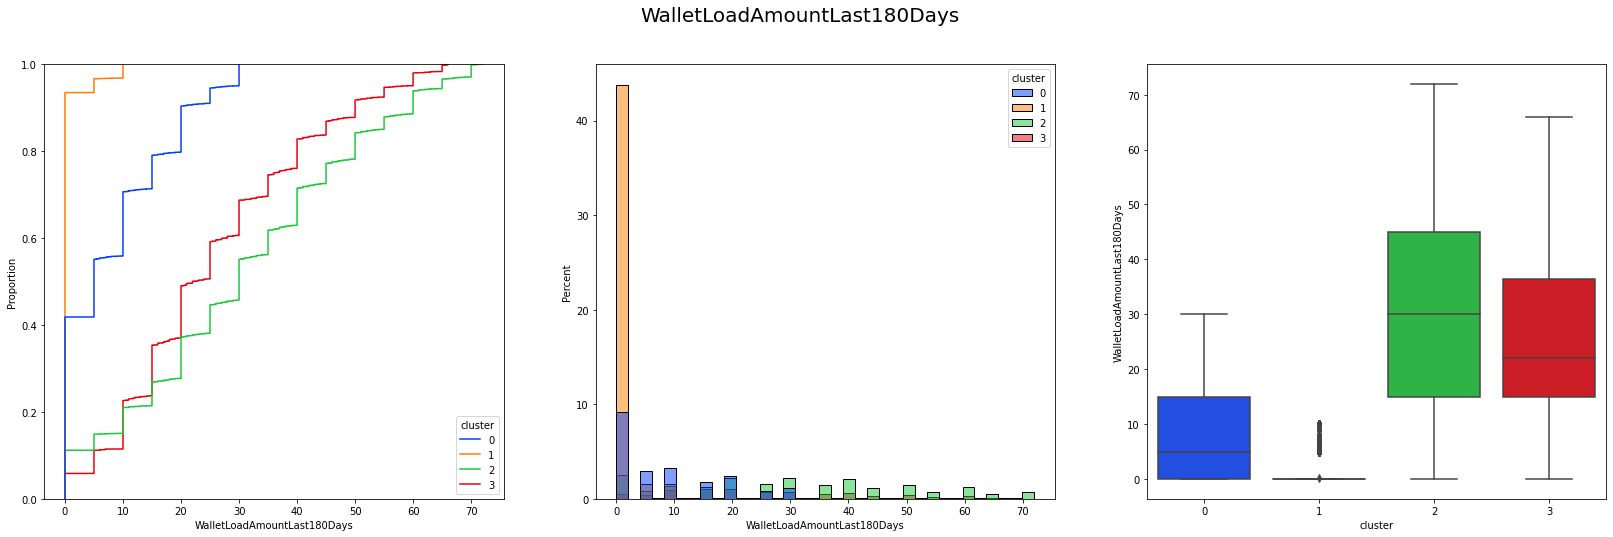

In [ ]:
for c in cols:
  gf1= df1.loc[df1.flag=='train']
  gf2=gf1.groupby('cluster')[c].quantile(.95).reset_index()
  gf1= gf1.merge(gf2, how='inner', on= 'cluster', suffixes=('', '_y'))
  gf1=gf1.loc[gf1.loc[:,c] <= gf1.loc[:,c+'_y']]
  fig, axes = plt.subplots(1,3,figsize=(28,8), sharey= False)
  # gf2= df1.loc[df1.flag=='test']
  fig.suptitle(c, fontsize=20)
  sns.ecdfplot(gf1, x= c, ax=axes[0], hue= 'cluster', palette='bright')
  # sns.ecdfplot(gf2, x= c, ax=axes[1,0], hue= 'cluster', palette='bright')
  sns.histplot(gf1, x= c, ax=axes[1], hue= 'cluster', palette='bright', stat= 'percent', bins=35)
  # sns.histplot(gf2, x= c, ax=axes[1,1], hue= 'cluster', palette='bright')
  sns.boxplot(data=gf1, x= 'cluster', y=c, palette='bright')
  # sns.boxplot(gf2, x= c, ax=axes[1,1], hue= 'cluster', palette='bright')
  # fig.tight_layout()
  # fig.subplots_adjust(top=0.90)
  plt.show()
  # plt.close()